# Setting Up Necessary Things


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
%cd /content/drive/My Drive/Project

/content/drive/My Drive/Project


In [ ]:
data_path = "Clothing"
image_counts = get_image_files(data_path)
image_counts

(#4263) [Path('Clothing/Bangladeshi Lungi/image_1.jpg'),Path('Clothing/Bangladeshi Lungi/image_2.jpg'),Path('Clothing/Bangladeshi Lungi/image_3.jpg'),Path('Clothing/Bangladeshi Lungi/image_4.jpg'),Path('Clothing/Bangladeshi Lungi/image_5.jpg'),Path('Clothing/Bangladeshi Lungi/image_6.jpg'),Path('Clothing/Bangladeshi Lungi/image_7.jpg'),Path('Clothing/Bangladeshi Lungi/image_8.jpg'),Path('Clothing/Bangladeshi Lungi/image_9.jpg'),Path('Clothing/Bangladeshi Lungi/image_10.jpg'),Path('Clothing/Bangladeshi Lungi/image_11.jpg'),Path('Clothing/Bangladeshi Lungi/image_12.jpg'),Path('Clothing/Bangladeshi Lungi/image_13.jpg'),Path('Clothing/Bangladeshi Lungi/image_14.jpg'),Path('Clothing/Bangladeshi Lungi/image_15.jpg'),Path('Clothing/Bangladeshi Lungi/image_16.jpg'),Path('Clothing/Bangladeshi Lungi/image_17.jpg'),Path('Clothing/Bangladeshi Lungi/image_18.jpg'),Path('Clothing/Bangladeshi Lungi/image_19.jpg'),Path('Clothing/Bangladeshi Lungi/image_20.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#4) [Path('Clothing/Indian Saree-Sari/image_142.jpg'),Path('Clothing/Middle Eastern Thobe-Dishdasha/image_63.jpg'),Path('Clothing/Middle Eastern Thobe-Dishdasha/image_73.jpg'),Path('Clothing/Polynesian Lavalava/image_214.jpg')]

In [ ]:
failed.map(Path.unlink)

(#4) [None,None,None,None]

## Loading data into Data Loaders

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:

dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

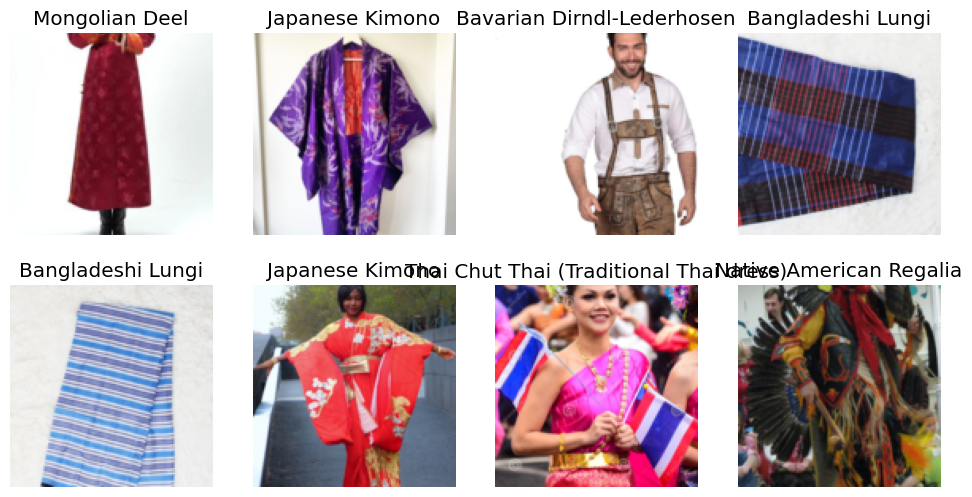

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

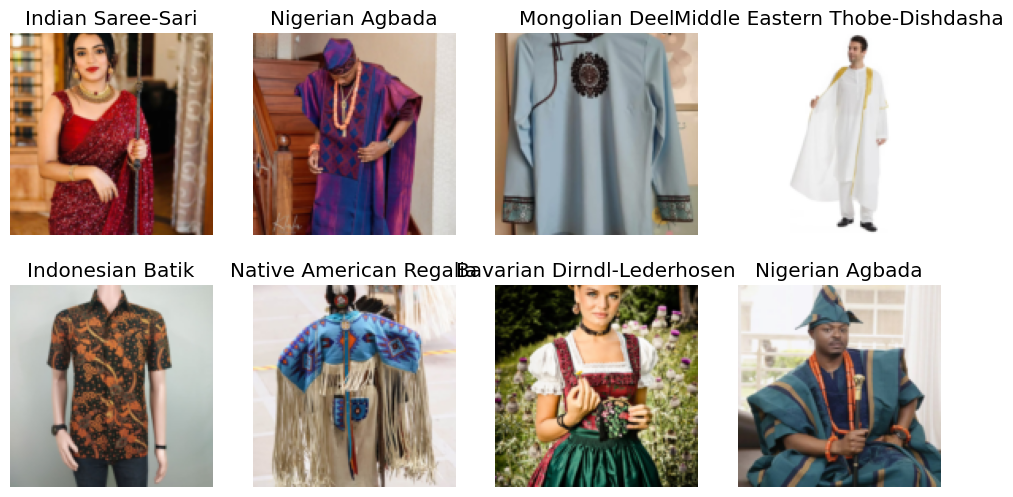

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

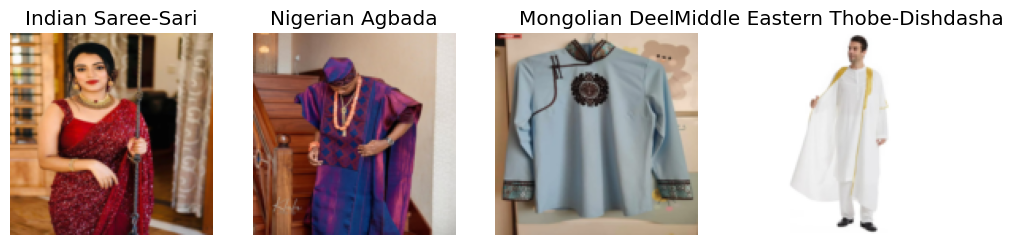

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

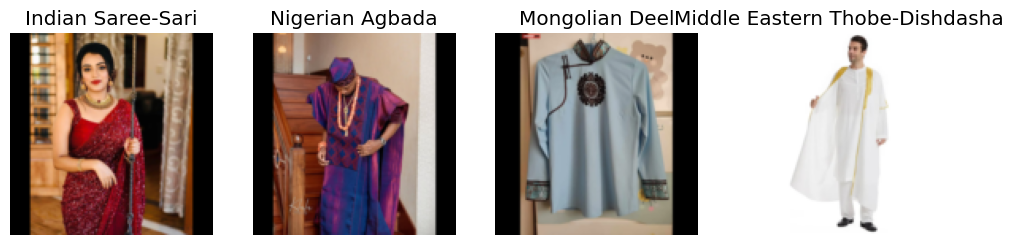

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

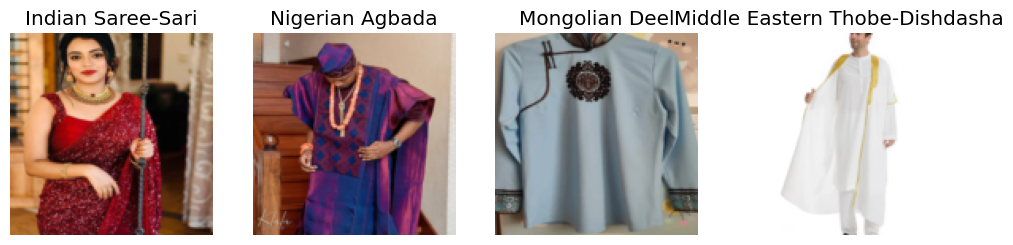

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

# Data Augmentation

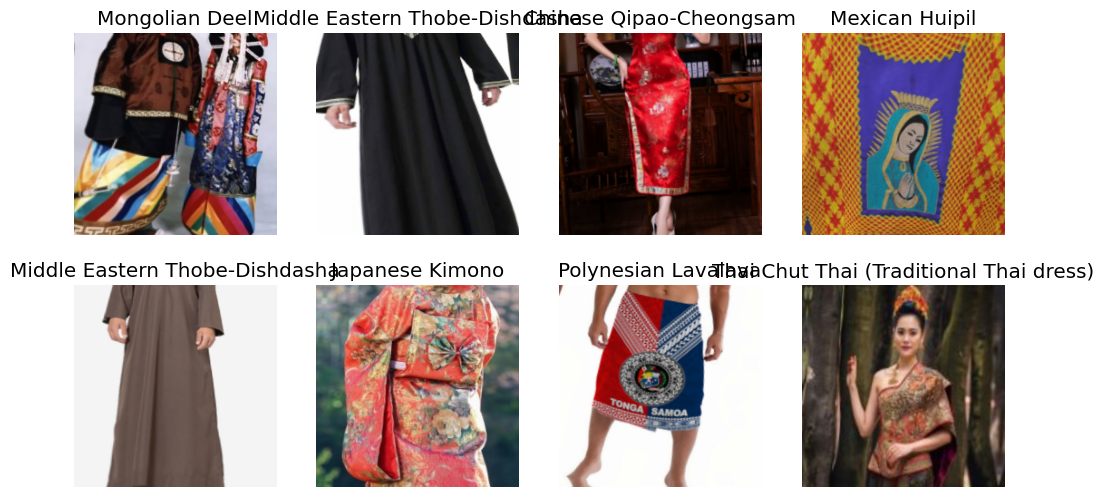

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "traditional-dress_dataloader_v0.pkl")